In [57]:
kernel_size = 7
sigma = 0.2

In [58]:
n = kernel_size // 2
kernel = np.zeros([kernel_size,1])
d_kernel = np.zeros([kernel_size,1])


In [60]:
for x in range(-n, n+1):
    kernel[x+n, :] = np.exp(-(x**2)/(2*(sigma**2)))
    d_kernel[x+n, :] = kernel[x+n, :] * (-x)/(sigma**2)

In [61]:
d_kernel.T

array([[ 1.03975747e-47,  9.64374924e-21,  9.31663293e-05,
         0.00000000e+00, -9.31663293e-05, -9.64374924e-21,
        -1.03975747e-47]])

In [62]:
image_list = glob.glob('*.jpg')

In [63]:
image_list

['dude.jpg', 'parthenon.jpg', 'statues.jpg']

In [64]:
image = cv.imread('dude.jpg', 0)

In [65]:
kernel_flipped = np.flip(kernel, axis=(0,1))

In [66]:
kernel_flipped

array([[1.38634329e-49],
       [1.92874985e-22],
       [3.72665317e-06],
       [1.00000000e+00],
       [3.72665317e-06],
       [1.92874985e-22],
       [1.38634329e-49]])

In [67]:
kernel

array([[1.38634329e-49],
       [1.92874985e-22],
       [3.72665317e-06],
       [1.00000000e+00],
       [3.72665317e-06],
       [1.92874985e-22],
       [1.38634329e-49]])

In [68]:
padding_x = kernel.shape[1] //2
padding_y = kernel.shape[0] //2

In [69]:
padding_x

0

In [70]:
padding_y

3

In [72]:
image_padded = np.zeros([image.shape[0] + (padding_y*2),
                         image.shape[1] + (padding_x*2)])

In [73]:
image_padded.shape, image.shape

((487, 321), (481, 321))

In [74]:
a  =image_padded[padding_y:-padding_y, :]
a.shape 

(481, 321)

In [76]:
image_padded = np.pad(image, ((padding_y, padding_y), (padding_x, padding_x)), mode= 'constant')

In [77]:
image_padded.shape

(487, 321)

In [49]:
image_padded - image_pad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
image_padded.shape[1] - kernel.shape[0] + (kernel.shape[0] % 2)

315

In [78]:
output = np.zeros([image.shape[0], image.shape[1]])
# Handle kernel orientation in x and y axis
if padding_x == 0:
    for y in range(image_padded.shape[0] - kernel.shape[0] + (kernel.shape[0] % 2)):
        for x in range(image_padded.shape[1] - kernel.shape[1] + (kernel.shape[1] % 2)):
            # Isolate an image patch with the same shape as the kernel
            image_patch = image_padded[y:(y+kernel.shape[0]), [x]]
            # Replace the output element with the convolution result
            output[y, x] = np.sum(image_patch * kernel_flipped)

elif padding_y == 0:
    for y in range(image_padded.shape[0] - kernel.shape[0] + (kernel.shape[0] % 2)):
        for x in range(image_padded.shape[1] - kernel.shape[1] + (kernel.shape[1] % 2)):
            # Isolate an image patch with the same shape as the kernel
            image_patch = image_padded[[y], x:(x+kernel.shape[1])]
            # Replace the output element with the convolution result
            output[y, x] = np.sum(image_patch * kernel_flipped)

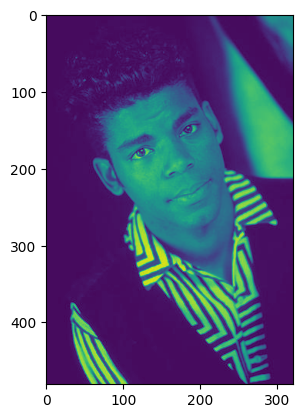

In [79]:
plt.imshow(output)

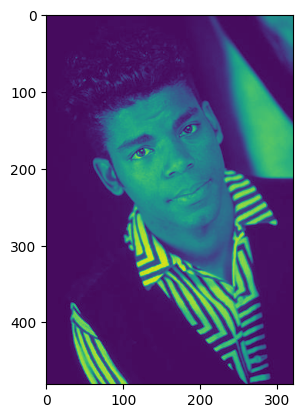

In [81]:
plt.imshow(image)

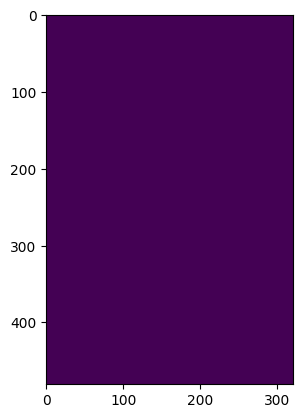

In [83]:
plt.imshow(image-image)

In [ ]:
# high_threshold = image.max() * high_threshold_ratio
#     low_threshold = image.max() * low_threshold_ratio

#     # Initiate the thresholded image with zero pixels
#     image_th = np.zeros(image.shape)

#     # Compare each pixel intensity with high and low threshold
#     for r in range(1, image_th.shape[0]-1):
#         for c in range(1, image_th.shape[1]-1):
#             # If a pixel intensity is higher than the high threshold, it will take the maximum intensity
#             if image[r, c] > high_threshold:
#                 image_th[r, c] = 255
#             # If a pixel intensity is lower than the low threshold, it will take the zero intensity
#             elif image[r, c] < low_threshold:
#                 image_th[r, c] = 0
#             # If a pixel intensity is in between, neighbor pixels are considered
#             elif low_threshold <= image[r, c] <= high_threshold:
#                 # If any of the neighboring pixel intensity is higher than the high threshold, 
#                 # the pixel will take maximum intensity (edge); otherwise will be suppressed to zero.
#                 if (image[r+1, c+1] > high_threshold) or \
#                 (image[r+1, c] > high_threshold) or \
#                 (image[r+1, c-1] > high_threshold) or \
#                 (image[r-1, c+1] > high_threshold) or \
#                 (image[r-1, c] > high_threshold) or \
#                 (image[r-1, c-1] > high_threshold) or \
#                 (image[r, c+1] > high_threshold) or \
#                 (image[r, c-1] > high_threshold):
#                     image_th[r, c] = 255
#                 else:
#                     image_th[r, c] = 0

In [84]:
edge_pixels = np.where((image>= 18) & (image<= 38.25))

In [85]:
edge_pixels

(array([  0,   0,   0, ..., 480, 480, 480], dtype=int64),
 array([208, 209, 210, ...,  70, 259, 262], dtype=int64))

In [88]:
for r,c in zip(*edge_pixels):
    neighborhood = image[r-1:r+1, c-1:c+1]
    print(neighborhood)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[[16 19]
 [16 18]]
[[19 22]
 [18 21]]
[[22 26]
 [21 26]]
[[26 31]
 [26 30]]
[[31 34]
 [30 34]]
[[34 34]
 [34 35]]
[[34 34]
 [35 35]]
[[34 33]
 [35 35]]
[[33 28]
 [35 32]]
[[28 25]
 [32 29]]
[[25 21]
 [29 24]]
[[21 15]
 [24 19]]
[[15 25]
 [15 23]]
[[25 30]
 [23 28]]
[[30 38]
 [28 35]]
[[18 21]
 [17 20]]
[[21 26]
 [20 24]]
[[26 30]
 [24 29]]
[[30 34]
 [29 34]]
[[34 35]
 [34 36]]
[[35 35]
 [36 38]]
[[35 35]
 [38 38]]
[[35 32]
 [38 36]]
[[32 29]
 [36 34]]
[[29 24]
 [34 29]]
[[24 19]
 [29 24]]
[[19 14]
 [24 18]]
[[15 23]
 [14 20]]
[[23 28]
 [20 25]]
[[28 35]
 [25 32]]
[[35 41]
 [32 38]]
[[17 20]
 [17 19]]
[[20 24]
 [19 23]]
[[24 29]
 [23 28]]
[[29 34]
 [28 33]]
[[34 36]
 [33 37]]
[[36 34]
 [39 37]]
[[34 29]
 [37 33]]
[[29 24]
 [33 28]]
[[24 18]
 [28 22]]
[[14 20]
 [13 18]]
[[20 25]
 [18 23]]
[[25 32]
 [23 30]]
[[32 38]
 [30 35]]
[[19 23]
 [17 21]]
[[23 28]
 [21 25]]
[[28 33]
 [25 31]]
[[33 37]
 [31 36]]
[[37 33]
 [40 36]]
[[33 28]
 [36 32]]
[[28 22]

In [89]:
image[0:3,0:3]

array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]], dtype=uint8)

In [ ]:
# image_nms = np.zeros(image.shape)
#         # Since we will consider pixels in both direction of the orientation vector,
#         # Theta is bound within [0, pi]
#         theta[theta < 0] += pi

#         # Check each element in the image gradient magnitude array.
#         for r in range(1, image.shape[0]-1):
#             for c in range(1, image.shape[1]-1):
#                 # Initiate the two pixels along both directions of the orientation 
#                 pixel_1 = 255
#                 pixel_2 = 255

#                 # Check the orientation angle within each pi/4 angular distance and choose two pixels accordingly
#                 if (0 <= theta[r, c] < pi/8) or (7*pi/8 <= theta[r, c] <= pi):
#                     pixel_1 = image[r, c+1]
#                     pixel_2 = image[r, c-1]
#                 elif (pi/8 <= theta[r, c] < 3*pi/8):
#                     pixel_1 = image[r+1, c+1]
#                     pixel_2 = image[r-1, c-1]
#                 elif (3*pi/8 <= theta[r, c] < 5*pi/8):
#                     pixel_1 = image[r+1, c]
#                     pixel_2 = image[r-1, c]
#                 elif (5*pi/8 <= theta[r, c] < 7*pi/8):
#                     pixel_1 = image[r+1, c-1]
#                     pixel_2 = image[r-1, c+1]

#                 # If the center pixel is not smaller than both of the pixels, then it is kept as such
#                 if (image[r, c] >= pixel_1) and (image[r, c] >= pixel_2):
#                     image_nms[r, c] = image[r, c]
#                 # If the center pixel is smaller than either of the pixels, it is suppressed to zero
#                 else:
#                     image_nms[r, c] = 0

In [97]:
theta = np.random.uniform(0, np.pi, size=(image.shape[0], image.shape[1]))

In [98]:
dx = np.cos(theta)
dy = np.sin(theta)

In [ ]:
dx, dy

In [105]:
r, c = 127, 160

In [106]:
r1, c1 = r + dy[r, c], c + dx[r, c]
r2, c2 = r - dy[r, c], c - dx[r, c]

In [110]:
r1, c1

(127.83606862732844, 160.5486248722006)

In [111]:
pixel1 = np.interp((r1, c1), (r, c), (image[r, c], image[r, c]))
pixel2 = np.interp((r2, c2), (r, c), (image[r, c], image[r, c]))

In [112]:
pixel1 

array([138., 138.])

In [113]:
pixel2

array([138., 138.])

In [114]:
if (0 <= theta[r, c] < pi/8) or (7*pi/8 <= theta[r, c] <= pi):
    pixel_1 = image[r, c+1]
    pixel_2 = image[r, c-1]
elif (pi/8 <= theta[r, c] < 3*pi/8):
    pixel_1 = image[r+1, c+1]
    pixel_2 = image[r-1, c-1]
elif (3*pi/8 <= theta[r, c] < 5*pi/8):
    pixel_1 = image[r+1, c]
    pixel_2 = image[r-1, c]
elif (5*pi/8 <= theta[r, c] < 7*pi/8):
    pixel_1 = image[r+1, c-1]
    pixel_2 = image[r-1, c+1]

# # If the center pixel is not smaller than both of the pixels, then it is kept as such
# if (image[r, c] >= pixel_1) and (image[r, c] >= pixel_2):
#     image_nms[r, c] = image[r, c]
# # If the center pixel is smaller than either of the pixels, it is suppressed to zero
# else:
#     image_nms[r, c] = 0

In [115]:
pixel_1, pixel_2

(137, 126)

In [5]:
class CannyEdgeDetector():
    def __init__(self,
                 image,
                 sigma,
                 kernel_size,
                 high_th_ratio,
                 low_th_ratio):
        '''
        image: np array
        sigma: std dev of gaussian kernel (int of float)
        kernel_size: # of datapoints in gaussian kernel (odd/even)
        high_th_ratio: ratio of high threshold and the max image intensity (int or float)
        low_th_ratio: ratio of low threshold and the max image intensity (int or float)
        
        '''

        self.image = image
        self.sigma = sigma
        self.kernel_size = kernel_size
        self.high_th_ratio = high_th_ratio
        self.low_th_ratio = low_th_ratio

    def get_gaussian_mask1d(self, kernel_size, sigma):
        '''
        Returns a 1d gaussian kernel of shape (kernel_size, 1) and its derivative
        ---------------
        sigma: std dev of gaussian kernel (int of float)
        kernel_size: # of datapoints in gaussian kernel (odd/even)
        '''

        #handle even kernel size
        if kernel_size % 2 == 0:
            kernel_size += 1

        #detemine the number of datapoints from the center
        n = kernel_size // 2

        #initiate kernel and derivative with zero values
        kernel = np.zeros([kernel_size, 1])
        d_kernel = np.zeros([kernel_size, 1])

        #replace each element in the kernels with corresponding gaussian and derivative
        for x in range(-n, n+1):
            kernel[x+n, :] = np.exp(-(x**2)/ (2*(sigma**2)))
            d_kernel[x+n, :] = kernel[x+n, :]  * (-x)/(sigma**2)

        #return the kernels
        return kernel.T, d_kernel.T
    

    def apply_conv(self, image, kernel):
        '''
        applies convolution on image patches using 1d kernel
        ----------------
        image, kernel: self explanatory, both array
        '''

        #flip kernel
        flipped_kernel = np.flip(kernel, axis=(0,1))

        #calculate required number of padding in each direction of image to keep
        #output shape similar as input image
        padding_x = kernel.shape[1] // 2
        padding_y = kernel.shape[0] // 2

        #vreate padded image
        padded_image = np.pad(image, ((padding_y, padding_y), (padding_x, padding_x)), mode='constant')

        #initiate output image with zeros
        output = np.zeros([image.shape[0], image.shape[1]])

        #handle kernel orientation
        for y in range(padded_image.shape[0]- kernel.shape[0] + (kernel.shape[0] % 2)):
            for x in range(padded_image.shape[1]- kernel.shape[1] + (kernel.shape[1] % 2)):
                #isolate image shape with same shape as kernel
                if padding_x == 0:
                    image_patch = padded_image[y:(y+kernel.shape[0]), [x]]
                elif padding_y == 0:
                    image_patch = padded_image[[y], x:(x+kernel.shape[1])]
                
                #get convolution result
                output[y,x] = np.sum(image_patch * flipped_kernel)

        return output
    
    def apply_non_max_supression(self, image, theta):
        '''
        applies non-max suppression on edges to keep only true edge pixels
        -----------
        theta: orientation of edge pixels w.r.t to x-axis (np array)
        '''

        #initiate the non-max-suppressed image with zeros
        nms_image = np.zeros(image.shape)
        #since we consider pixels in both directions of orientation vector,
        #theta is bound within [0,pi]
        theta[theta < 0] += pi

        #check each element in image gradient magnitude array
        for r in range(1, image.shape[0]-1):
            for c in range(1, image.shape[1]-1):
                #initiate pixels along both directions
                pixel_1, pixel_2 = 0,0

                #check orientation angle within each pi/4 angular distance and choose two pixels accordingly
                if (0 <= theta[r, c] < pi/8) or (7*pi/8 <= theta[r, c] <= pi):
                    pixel_1 = image[r, c+1]
                    pixel_2 = image[r, c-1]
                elif (pi/8 <= theta[r, c] < 3*pi/8):
                    pixel_1 = image[r+1, c+1]
                    pixel_2 = image[r-1, c-1]
                elif (3*pi/8 <= theta[r, c] < 5*pi/8):
                    pixel_1 = image[r+1, c]
                    pixel_2 = image[r-1, c]
                elif (5*pi/8 <= theta[r, c] < 7*pi/8):
                    pixel_1 = image[r+1, c-1]
                    pixel_2 = image[r-1, c+1]

                #if center pixel is larger than both of the pixels, then keep it as such
                #else suppress to zero
                if (image[r,c] >= pixel_1) and (image[r,c] >= pixel_2):
                    nms_image[r,c] = image[r,c]
                else:
                    nms_image[r,c] = 0

        return nms_image
    
    def apply_hysteresis_thresholding(self, image, high_th_ratio, low_th_ratio):
        '''
        applies hysteresis thresholding on image
        '''

        # Calculate high and low threshold for hysteresis from the ratio values
        high_th = image.max() * high_th_ratio
        low_th = image.max() * low_th_ratio

        # Initiate the thresholded image with zero pixels
        image_th = np.zeros(image.shape)

        # Pixels higher than the high threshold are considered edges
        image_th[image > high_th] = 255

        # Find pixels between the low and high thresholds and check neighbors
        edge_pixels = np.where((low_th <= image) & (image <= high_th))
        for r, c in zip(*edge_pixels):
            neighborhood = image[r-1:r+2, c-1:c+2]
            if np.any(neighborhood > high_th):
                image_th[r, c] = 255

        return image_th
    
    def edge_detection(self):
        '''
        applies canny edge detector on images
        '''

        #generate 1d gaussian kernel and the derivative kernel
        self.G, self.G_x = self.get_gaussian_mask1d(self.kernel_size, self.sigma)

        #get G_y
        self.G_y = self.G_x.T

        #apply gaussian kernel to reduce noise of image
        self.blurred_I_x = self.apply_conv(self.image, self.G)
        self.blurred_I_y = self.apply_conv(self.image, self.G.T)

        #get derviative of blurred image
        self.I_x = self.apply_conv(self.blurred_I_x, self.G_x)
        self.I_y = self.apply_conv(self.blurred_I_y, self.G_y)

        #get magnitude and orientation of derivative
        self.M_xy = np.sqrt(np.square(self.I_x) + np.square(self.I_y))
        self.M_xy = self.M_xy / self.M_xy.max() * 255
        self.theta = np.arctan2(self.I_y, self.I_x)

        #apply non-max_supression for thinner edges
        self.nms_I = self.apply_non_max_supression(self.M_xy, self.theta)

        #apply hysteresis thresholding to join/isolate edge detached pixels
        self.I_edge = self.apply_hysteresis_thresholding(self.nms_I,
                                                         self.high_th_ratio,
                                                         self.low_th_ratio)
        
        return self.I_edge


    def plot_result(self):
        '''
        plots edges detected by canny detector along with intermediate results
        '''

        fig, ax = plt.subplots(3,2, figsize= (15,15))
        plt.subplot(321)
        plt.imshow(self.blurred_I_x, cmap='gray')
        plt.title(f'(a) blurred_I_x')
        plt.subplot(322)
        plt.imshow(self.blurred_I_y, cmap='gray')
        plt.title(f'(b) blurred_I_y')
        plt.subplot(323)
        plt.imshow(self.I_x, cmap='gray')
        plt.title(f'(c) $I_x$')
        plt.subplot(324)
        plt.imshow(self.I_y, cmap='gray')
        plt.title(f'(d) $I_y')
        plt.subplot(325)
        plt.imshow(self.M_xy, cmap='gray')
        plt.title('(e) Gradient Magnitude')
        plt.subplot(326)
        plt.imshow(self.I_edge, cmap='gray')
        plt.title('(f) Canny Detected Edge')                    

In [ ]:
'''
main code
'''
# get all images from current directory
images = glob.glob('*.jpg')

#plot intermediate results
for image in images:
    I = cv.imread(image, 0)
    #create an instance of CannyEdgeDetector class
    canny = CannyEdgeDetector(image=I, 
                              sigma=2,
                              kernel_size=7,
                              high_th_ratio=0.2,
                              low_th_ratio=0.08)
    
    #generate edges of image
    edge = canny.edge_detection()
    #generate resulted plots
    canny.plot_result()
    #save plots
    plt.tight_layout()
    plt.savefig(f"edge_{image.split('.')[0]}.png")
    plt.show()

In [ ]:
# do the experiments for varying sigma values
sigma_list = [0.1, 2, 10]

# plot canny edges varying the sigma
for image in images:
    # create subplot layout
    fig, ax = plt.subplots(1,3,figsize=(15,12))
    for i, sigma in enumerate(sigma_list):
        I = cv.imread(image, 0)
        # create an instance of CannyEdgeDetector class
        canny = CannyEdgeDetector(image=I,
                                  sigma=sigma, 
                                  kernel_size=7,
                                  high_th_ratio=0.2,
                                  low_th_ratio=0.08)
        
        #generate edges of image
        edge = canny.edge_detection()
        #plot results accordingly
        plt.subplot(1,3,i+1)
        plt.imshow(edge, cmap='gray')
        plt.title(f'$\sigma = ${sigma}')
    
    #save figures
    plt.tight_layout()
    plt.savefig(f"sigma_{image.split('.')[0]}.png")
    plt.show()